# When a neuron meets another
### We will explore the interaction of an interneuron with a stellate cells

In [2]:
cd Network/

/media/arun/Data/arun_files/thesis_files/neru2019/theta_gates_reliable_sequences_mEC/Network


In [2]:
ls

bins/  configure_files/  main_files/  noise.hpp  scripts/


### Main function calling the integrator 
### Note the specification of Neuron types and synapse types

#### One Stellate cell
#### engine::generate_neuron < N_Stellate_HR2005 > (1);

#### One Interneuron
#### engine::generate_neuron < N_InterNeuron_Wang96 > (1);

#### Two synapse
#### engine::generate_synapse < S_TanHSynapse > (2);

In [5]:


cat main_files/main_I2E2_switching_autonomous.cpp

#include "insilico/core.hpp"
#include "neuron/N_InterNeuron_Wang96_I2E2_switch_autonomous.hpp"
#include "neuron/N_Stellate_HR2005_I1E1_ExtPulse.hpp"
#include "synapse/S_TanHSynapse.hpp"
#include <boost/numeric/odeint.hpp> 
#include <fstream> 
#include <iostream> 
#include <iomanip> 
#include <string> 
#include <vector> 
#include <iostream> 
#include <fstream> 
#include <map> 
#include <random> 

//#include <omp.h>
//#include <boost/numeric/odeint/external/openmp/openmp.hpp>
using namespace boost::numeric::odeint; 
using namespace insilico; 
using namespace std;

int main(int argc, char **argv) {
	configuration::initialize(argc, argv);

	configuration::observe("v");

        configuration::observe_skipiters(10);

        engine::generate_neuron<N_Stellate_HR2005>(1);
	engine::generate_neuron<N_InterNeuron_Wang96>(1);
	engine::generate_synapse<S_TanHSynapse>(2);

	state_type variables = engine::get_variables();
	integrate_const(euler<state_type>(), engine::driver(), variables,
	0.0, 1000

## Generate the noise header file

### run scripts/write_noise.py seed numberOfNeurons


In [7]:
run scripts/write_noise.py 0 2

### A noise.hpp file with the specified seed instantiating a random number generator is produced

In [8]:
cat noise.hpp

#pragma once
#include "insilico/core/engine.hpp"
#include <cmath>
#include<random>
#include<vector>

namespace insilico { namespace noise {

std::mt19937_64 gen(0);
std::normal_distribution<double> dist(0,1);
std::vector<double> randomize(2);
double inject(unsigned index)
 {
	randomize[index]= dist(gen);
	return randomize[index];

}
} } // insilico


### Compile the header files with g++, compiler flags, etc

In [10]:
import os
os.system("g++ -O3 -Ofast -std=c++11 -I../insilico-0.25/include -o bins/insilico_Network.out main_files/main_Network.cpp ;")

0

### Check that the insilico_Neuron_0trial.out is generted in the bins directory

In [12]:
ls bins/

insilico_Network.out*


### Generate the helper files with parameters for the neuron (Ion channel, applied current, etc)

In [15]:
run scripts/gen_nsets_Network.py

configure_files/nsets_Network_0.1i2i.isf
configure_files/nsets_Network_0.2i2i.isf
configure_files/nsets_Network_0.3i2i.isf
configure_files/nsets_Network_0.4i2i.isf
configure_files/nsets_Network_0.5i2i.isf
5


In [16]:
cat configure_files/nsets_Network_0.1i2i.isf

"neuron 0"dxdt:7,v:-55.036,m:0.0224224,n:0.103519,h:0.954963,ms:0.0678057,mhs:0.118111,mhf:0.0779264,gh:1.5,I_syn:0.0,ampSin:0.0,ampNoise:0.008,freq:0.0,phase:0.0,V_th_Osc:-80,tau_fact:1.0,PulseDuration:10000,PulseStart:500,PulseEnd:9500,tau_rise:137.0,tau_fall:20.0,PulseMax:-2.7,PulseMin:-3.6,I_PeriodicPulse:0.0,I_OscillatoryDrive:0.0, I_Na_Stellate_HR2005:0.0, I_K_Stellate_HR2005:0.0, I_Leak_Stellate_HR2005:0.0, I_NaP_Stellate_HR2005:0.0, I_Hs_Stellate_HR2005:0.0, I_Hf_Stellate_HR2005:0.0, ;

"neuron 1 "dxdt:3,v:3.850352,n:0.764751,h:0.283859,I_DC:0.0,ampSin:0.0,ampNoise:0.015,freq:0.0,phase:0.0,V_th_Osc:-80,PulseDuration:10000,PulseStart:500,PulseEnd:9500,tau_rise:20.0,tau_fall:20.0,PulseMax:0.1,PulseMin:-0.05,I_PeriodicPulse:0.0,I_syn:0.0,I_OscillatoryDrive:0.0, I_Na_InterNeuron_Wang96:0.0, I_K_InterNeuron_Wang96:0.0, I_Leak_InterNeuron_Wang96:0.0 ;



### Connecting the neurons
#### The parameters of the synapses, the connectivity information, etc is stored in the sset.isf file

In [20]:
run scripts/gen_ssets_Network.py

configure_files/ssets_I1E1_gei0.03_gie0.6.isf
2


In [22]:
cat configure_files/ssets_I1E1_gei0.03_gie0.6.isf

"synapse 1"dxdt:1,s:0,gsyn:0.030000,tau_r:0.01,tau_d:3.0,esyn:0,delay:0.0,pre:0,post:1;"synapse 2"dxdt:1,s:0,gsyn:0.600000,tau_r:.30,tau_d:9.0,esyn:-80,delay:0.0,pre:1,post:0;

### Time to run the simulation. We will store the result in the output file named "output_Network.dat" in the folder dir_output

In [25]:
outputFN = "dir_output/output_Network.dat"
nsetFN = "configure_files/nsets_Network_0.1i2i.isf"
ssetFN = "configure_files/ssets_I1E1_gei0.03_gie0.6.isf"
dparams = dict()
dparams['outputFN'] = outputFN
dparams['nsetFN'] = nsetFN
dparams['ssetFN'] = ssetFN
os.system("./bins/insilico_Network.out -o {p[outputFN]} -n {p[nsetFN]} -s {p[ssetFN]}".format(p=dparams))


0

### Fllow the insilico convention for running a simulation "bin -o outputFileName  -n nsetFileName"

In [96]:
os.system("./bins/insilico_Neuron_0trial.out -o {p[outputFN]} -n {p[nsetFN]}".format(p=dparams))

0

### Verify that the output is generated in the folder dir_output

In [26]:
ls dir_output

output_Network.dat


### Analysing the output

In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
data = np.loadtxt("dir_output/output_Network.dat",delimiter=',',comments='time')

In [29]:
data.shape

(100000, 3)

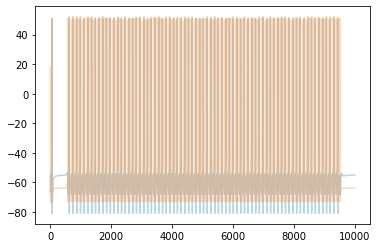

In [41]:
plt.plot(data[:,0], data[:,1],alpha=0.3)
plt.plot(data[:,0], data[:,2], alpha=0.3)

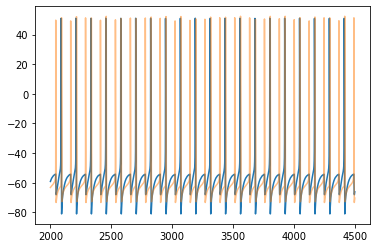

In [46]:
plt.plot(data[20000:45000,0], data[20000:45000,1])
plt.plot(data[20000:45000,0], data[20000:45000,2],alpha=0.5)

### Introducing theta
### Change the value of freq and ampSin parameters in the scripts/gen_nsets_Network.py


In [68]:
run scripts/gen_nsets_Network.py

configure_files/nsets_Network_0.1i2i.isf
configure_files/nsets_Network_0.2i2i.isf
configure_files/nsets_Network_0.3i2i.isf
configure_files/nsets_Network_0.4i2i.isf
configure_files/nsets_Network_0.5i2i.isf
5


In [69]:
cat configure_files/nsets_Network_0.1i2i.isf

"neuron 0"dxdt:7,v:-55.036,m:0.0224224,n:0.103519,h:0.954963,ms:0.0678057,mhs:0.118111,mhf:0.0779264,gh:1.5,I_syn:0.0,ampSin:0.0,ampNoise:0.008,freq:0.0,phase:0.0,V_th_Osc:-80,tau_fact:1.0,PulseDuration:10000,PulseStart:500,PulseEnd:9500,tau_rise:137.0,tau_fall:20.0,PulseMax:-2.7,PulseMin:-3.6,I_PeriodicPulse:0.0,I_OscillatoryDrive:0.0, I_Na_Stellate_HR2005:0.0, I_K_Stellate_HR2005:0.0, I_Leak_Stellate_HR2005:0.0, I_NaP_Stellate_HR2005:0.0, I_Hs_Stellate_HR2005:0.0, I_Hf_Stellate_HR2005:0.0, ;

"neuron 1 "dxdt:3,v:3.850352,n:0.764751,h:0.283859,I_DC:0.0,ampSin:0.05,ampNoise:0.015,freq:7.0,phase:0.0,V_th_Osc:-80,PulseDuration:10000,PulseStart:500,PulseEnd:9500,tau_rise:20.0,tau_fall:20.0,PulseMax:0.1,PulseMin:-0.05,I_PeriodicPulse:0.0,I_syn:0.0,I_OscillatoryDrive:0.0, I_Na_InterNeuron_Wang96:0.0, I_K_InterNeuron_Wang96:0.0, I_Leak_InterNeuron_Wang96:0.0 ;



In [70]:
outputFN = "dir_output/output_Network_with_theta.dat"
nsetFN = "configure_files/nsets_Network_0.1i2i.isf"
ssetFN = "configure_files/ssets_I1E1_gei0.03_gie0.6.isf"
dparams = dict()
dparams['outputFN'] = outputFN
dparams['nsetFN'] = nsetFN
dparams['ssetFN'] = ssetFN
os.system("./bins/insilico_Network.out -o {p[outputFN]} -n {p[nsetFN]} -s {p[ssetFN]}".format(p=dparams))

0

In [71]:
data = np.loadtxt("dir_output/output_Network_with_theta.dat",delimiter=',',comments='time')

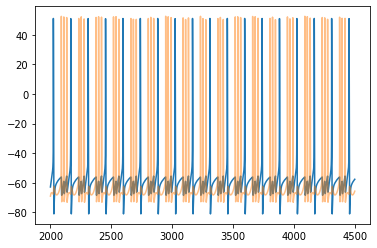

In [72]:
plt.plot(data[20000:45000,0], data[20000:45000,1])
plt.plot(data[20000:45000,0], data[20000:45000,2],alpha=0.5)

### Automating the workflow (More or less)

### Refactoring the code into a function


In [73]:
def run_Once(dparams):
    outputFN = "dir_output/output_Network_with_{p[gie]}gie_theta.dat".format(p=dparams)
    nsetFN = "configure_files/nsets_Network_0.1i2i.isf"
    ssetFN = "configure_files/ssets_I1E1_gei0.03_gie{p[gie]}.isf".format(p=dparams)
    dparams['outputFN'] = outputFN
    dparams['nsetFN'] = nsetFN
    dparams['ssetFN'] = ssetFN
    os.system("./bins/insilico_Network.out -o {p[outputFN]} -n {p[nsetFN]} -s {p[ssetFN]}".format(p=dparams))


In [79]:
run scripts/gen_ssets_Network.py

configure_files/ssets_I1E1_gei0.03_gie0.0.isf
2
configure_files/ssets_I1E1_gei0.03_gie0.005.isf
2
configure_files/ssets_I1E1_gei0.03_gie0.01.isf
2
configure_files/ssets_I1E1_gei0.03_gie0.015.isf
2
configure_files/ssets_I1E1_gei0.03_gie0.02.isf
2
configure_files/ssets_I1E1_gei0.03_gie0.025.isf
2
configure_files/ssets_I1E1_gei0.03_gie0.03.isf
2
configure_files/ssets_I1E1_gei0.03_gie0.035.isf
2


In [81]:
import time
st_t = time.time()

cnt = 0
l_gies = [0.0,0.005,0.01,0.015,0.02,0.025,0.03,0.035]

l_dparams = []

for gie in l_gies:
    l_dparams.append({'gie':str(gie)})
    cnt += 1

print(cnt)

for d_params in l_dparams:
    run_Once(d_params)
end_t = time.time()
print("It took ", (end_t - st_t )/60.0 ," minutes to run the entire set of simulations!!")


8
It took  4.865234367052714  minutes to run the entire set of simulations!!


dir_output/output_Network_with_0.0gie_theta.dat
dir_output/output_Network_with_0.005gie_theta.dat
dir_output/output_Network_with_0.01gie_theta.dat
dir_output/output_Network_with_0.015gie_theta.dat
dir_output/output_Network_with_0.02gie_theta.dat
dir_output/output_Network_with_0.025gie_theta.dat
dir_output/output_Network_with_0.03gie_theta.dat
dir_output/output_Network_with_0.035gie_theta.dat


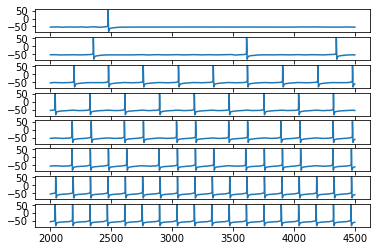

In [82]:
fig,axs = plt.subplots(len(l_gies),1)
for ind,i2i in enumerate(l_gies):
    outputFN = "dir_output/output_Network_with_{}gie_theta.dat".format(str(i2i))
    print(outputFN)
    data = np.loadtxt(outputFN, delimiter=',', comments='time')
    axs[ind].plot(data[20000:45000,0],data[20000:45000,1])
